## Brayan's Notebook

This notebook is Brayan's exploration on comparing observations from space of Near Earth Objects (NEOs), specifically Potentially Hazardous Asteroids (PHAs), to what we observe on Earth

In [3]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Cleaning Process

In [45]:
#import NEO data
NEO_df= pd.read_csv('../raw/NEO_sample.csv')
NEO_df

neo pha  diameter         GM       e      a    last_obs
0         N   N   939.400  62.628400  0.0796  2.766  2021-01-28
1         N   N   513.000  13.630000  0.2306  2.770  2025-11-05
2         N   N   246.596        NaN  0.2558  2.671  2025-08-08
3         N   N   522.770  17.288284  0.0902  2.362  2021-03-17
4         N   N   106.699        NaN  0.1875  2.577  2025-10-19
...      ..  ..       ...        ...     ...    ...         ...
1480747   N   N       NaN        NaN  0.2498  2.425  2024-10-06
1480748   N   N       NaN        NaN  0.2827  2.336  2024-06-16
1480749   Y   Y       NaN        NaN  0.6617  2.821  2021-08-04
1480750   N   N       NaN        NaN  0.1297  2.359  2024-10-24
1480751   N   N       NaN        NaN  0.1492  2.717  2015-01-25

[1480752 rows x 7 columns]

Select only potentially hazardous asteroids (PHAs) $\rightarrow$ where `pha` column is 'Y' (for yes)

In [46]:
PHA_df=NEO_df[NEO_df['pha']=='Y'] # Selecting only Potentially Hazardous Asteroids (PHAs)
PHA_df

neo pha  diameter  GM       e      a    last_obs
1565      Y   Y      1.00 NaN  0.8270  1.078  2025-08-18
1619      Y   Y      2.56 NaN  0.3355  1.246  2025-11-30
1861      Y   Y      1.50 NaN  0.5599  1.471  2025-11-29
1980      Y   Y      3.40 NaN  0.6505  1.776  2025-11-29
2100      Y   Y      0.60 NaN  0.7641  1.874  2025-07-19
...      ..  ..       ...  ..     ...    ...         ...
1480502   Y   Y       NaN NaN  0.8226  3.126  2025-11-29
1480518   Y   Y       NaN NaN  0.7086  2.449  2025-11-28
1480629   Y   Y       NaN NaN  0.5917  1.428  2025-12-01
1480739   Y   Y       NaN NaN  0.3482  1.499  2025-12-01
1480749   Y   Y       NaN NaN  0.6617  2.821  2021-08-04

[2521 rows x 7 columns]

Search for any missing data

In [47]:
PHA_df.isnull().sum() #NaN counts for each column

neo            0
pha            0
diameter    2182
GM          2517
e              0
a              0
last_obs       0
dtype: int64

Most of the datapoints have a NaN for the diameter and even more for the mass (GM), therefore, these may not be the best parameters to use in our analysis

# Exploring the NEO dataset with Meteorite Landings dataset

In [69]:
meteor_df= pd.read_csv("../raw/Meteorite_Landings.csv")
meteor_df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[45716 rows x 10 columns]

In [17]:
PHA_df['year'] = pd.to_datetime(PHA_df['first_obs'], errors='coerce').dt.year

meteor_yearly = meteor_df.groupby('year').size().reset_index(name='meteorite_count')
PHA_yearly = PHA_df.groupby('year').size().reset_index(name='neo_count')




print(meteor_df['year'])
print(PHA_df['year'])

print(meteor_yearly)
print(PHA_yearly)

0        1880.0
1        1951.0
2        1952.0
3        1976.0
4        1902.0
          ...  
45711    1990.0
45712    1999.0
45713    1939.0
45714    2003.0
45715    1976.0
Name: year, Length: 45716, dtype: float64
0       1949
1       1951
2       1930
3       1973
4       1936
        ... 
2510    2025
2511    2025
2512    2025
2513    2025
2514    1960
Name: year, Length: 2515, dtype: int32
       year  meteorite_count
0     860.0                1
1     920.0                1
2    1399.0                1
3    1490.0                1
4    1491.0                1
..      ...              ...
260  2010.0             1005
261  2011.0              713
262  2012.0              234
263  2013.0               11
264  2101.0                1

[265 rows x 2 columns]
    year  neo_count
0   1930          1
1   1931          1
2   1934          1
3   1936          1
4   1937          2
..   ...        ...
61  2021         55
62  2022         58
63  2023         62
64  2024         60
65  2025

In [18]:
merged = pd.merge(meteor_yearly, PHA_yearly, on='year', how='inner')

1930


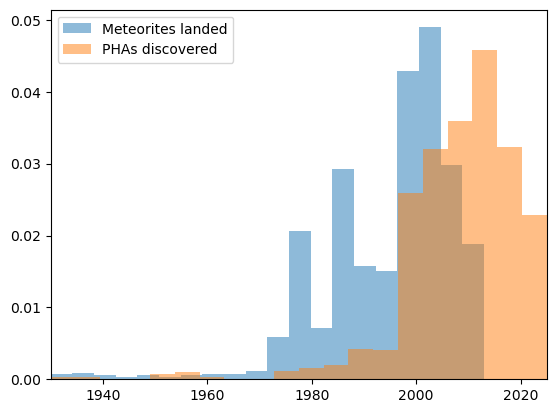

In [44]:
plt.hist(meteor_df[(meteor_df['year'] >= PHA_df['year'].min()) & (meteor_df['year'] <= 2025)]['year'], density=True, alpha=0.5, bins=20, label='Meteorites landed')
plt.hist(PHA_df['year'], density=True, alpha=0.5, bins=20, label="PHAs discovered")
plt.xlim(PHA_df['year'].min(), PHA_df['year'].max())

print(PHA_df['year'].min())
plt.legend()
plt.show()

In [38]:
merged[['meteorite_count', 'neo_count']].corr(method='pearson')

meteorite_count  neo_count
meteorite_count         1.000000   0.476224
neo_count               0.476224   1.000000

In [39]:
merged[['meteorite_count', 'neo_count']].corr(method='spearman')

meteorite_count  neo_count
meteorite_count         1.000000   0.645975
neo_count               0.645975   1.000000

# Plotting Map of Meteorite Landings

### Cleaning Meteorite Landing Datasaet

In [70]:
meteor_df.isnull().sum() #NaN counts for each column

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [73]:
#Omit data points that don't have any spacial datapoints, which is why reclat, reclong, and GeoLocation all have the same number of NaNs
clean_meteor_df = meteor_df.dropna(subset=["reclat"])
clean_meteor_df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[38401 rows x 10 columns]

1


(array([7.0800e+02, 2.8570e+03, 1.6800e+02, 1.5929e+04, 5.9320e+03,
        8.3700e+02, 1.1969e+04, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-165.43333 , -113.442664,  -61.451998,   -9.461332,   42.529334,
          94.52    ,  146.510666,  198.501332,  250.491998,  302.482664,
         354.47333 ]),
 <BarContainer object of 10 artists>)

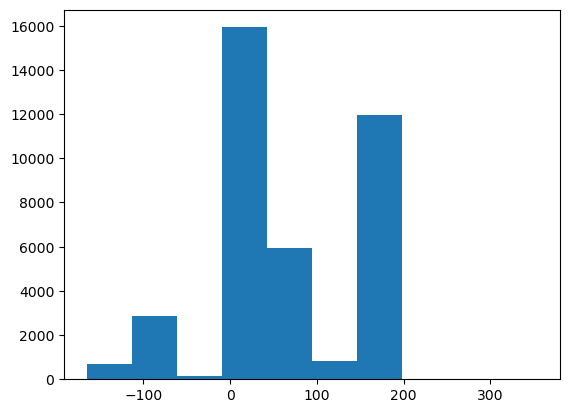

In [74]:
#Cleaning Meteorite dataset

#Meteorite Dataset should have Lat between -90 to 90 and longitude between -180 and 180
print(len(clean_meteor_df[(clean_meteor_df['reclong'] < -180) | (clean_meteor_df['reclong'] > 180)]))


plt.hist(clean_meteor_df['reclong'])

(array([  264.,  1481.,  1800.,   110.,  7244.,  8756.,  3315.,  2681.,
          759., 11990.]),
 array([-165.43333 , -131.069997,  -96.706664,  -62.343331,  -27.979998,
           6.383335,   40.746668,   75.110001,  109.473334,  143.836667,
         178.2     ]),
 <BarContainer object of 10 artists>)

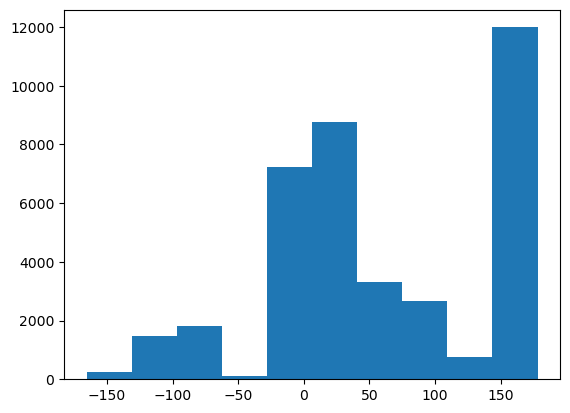

In [ ]:
#removing that data point with long above 180
clean_meteor_df= clean_meteor_df[(clean_meteor_df['reclong'] >= -180) & (clean_meteor_df['reclong'] <= 180)]
clean_meteor_df

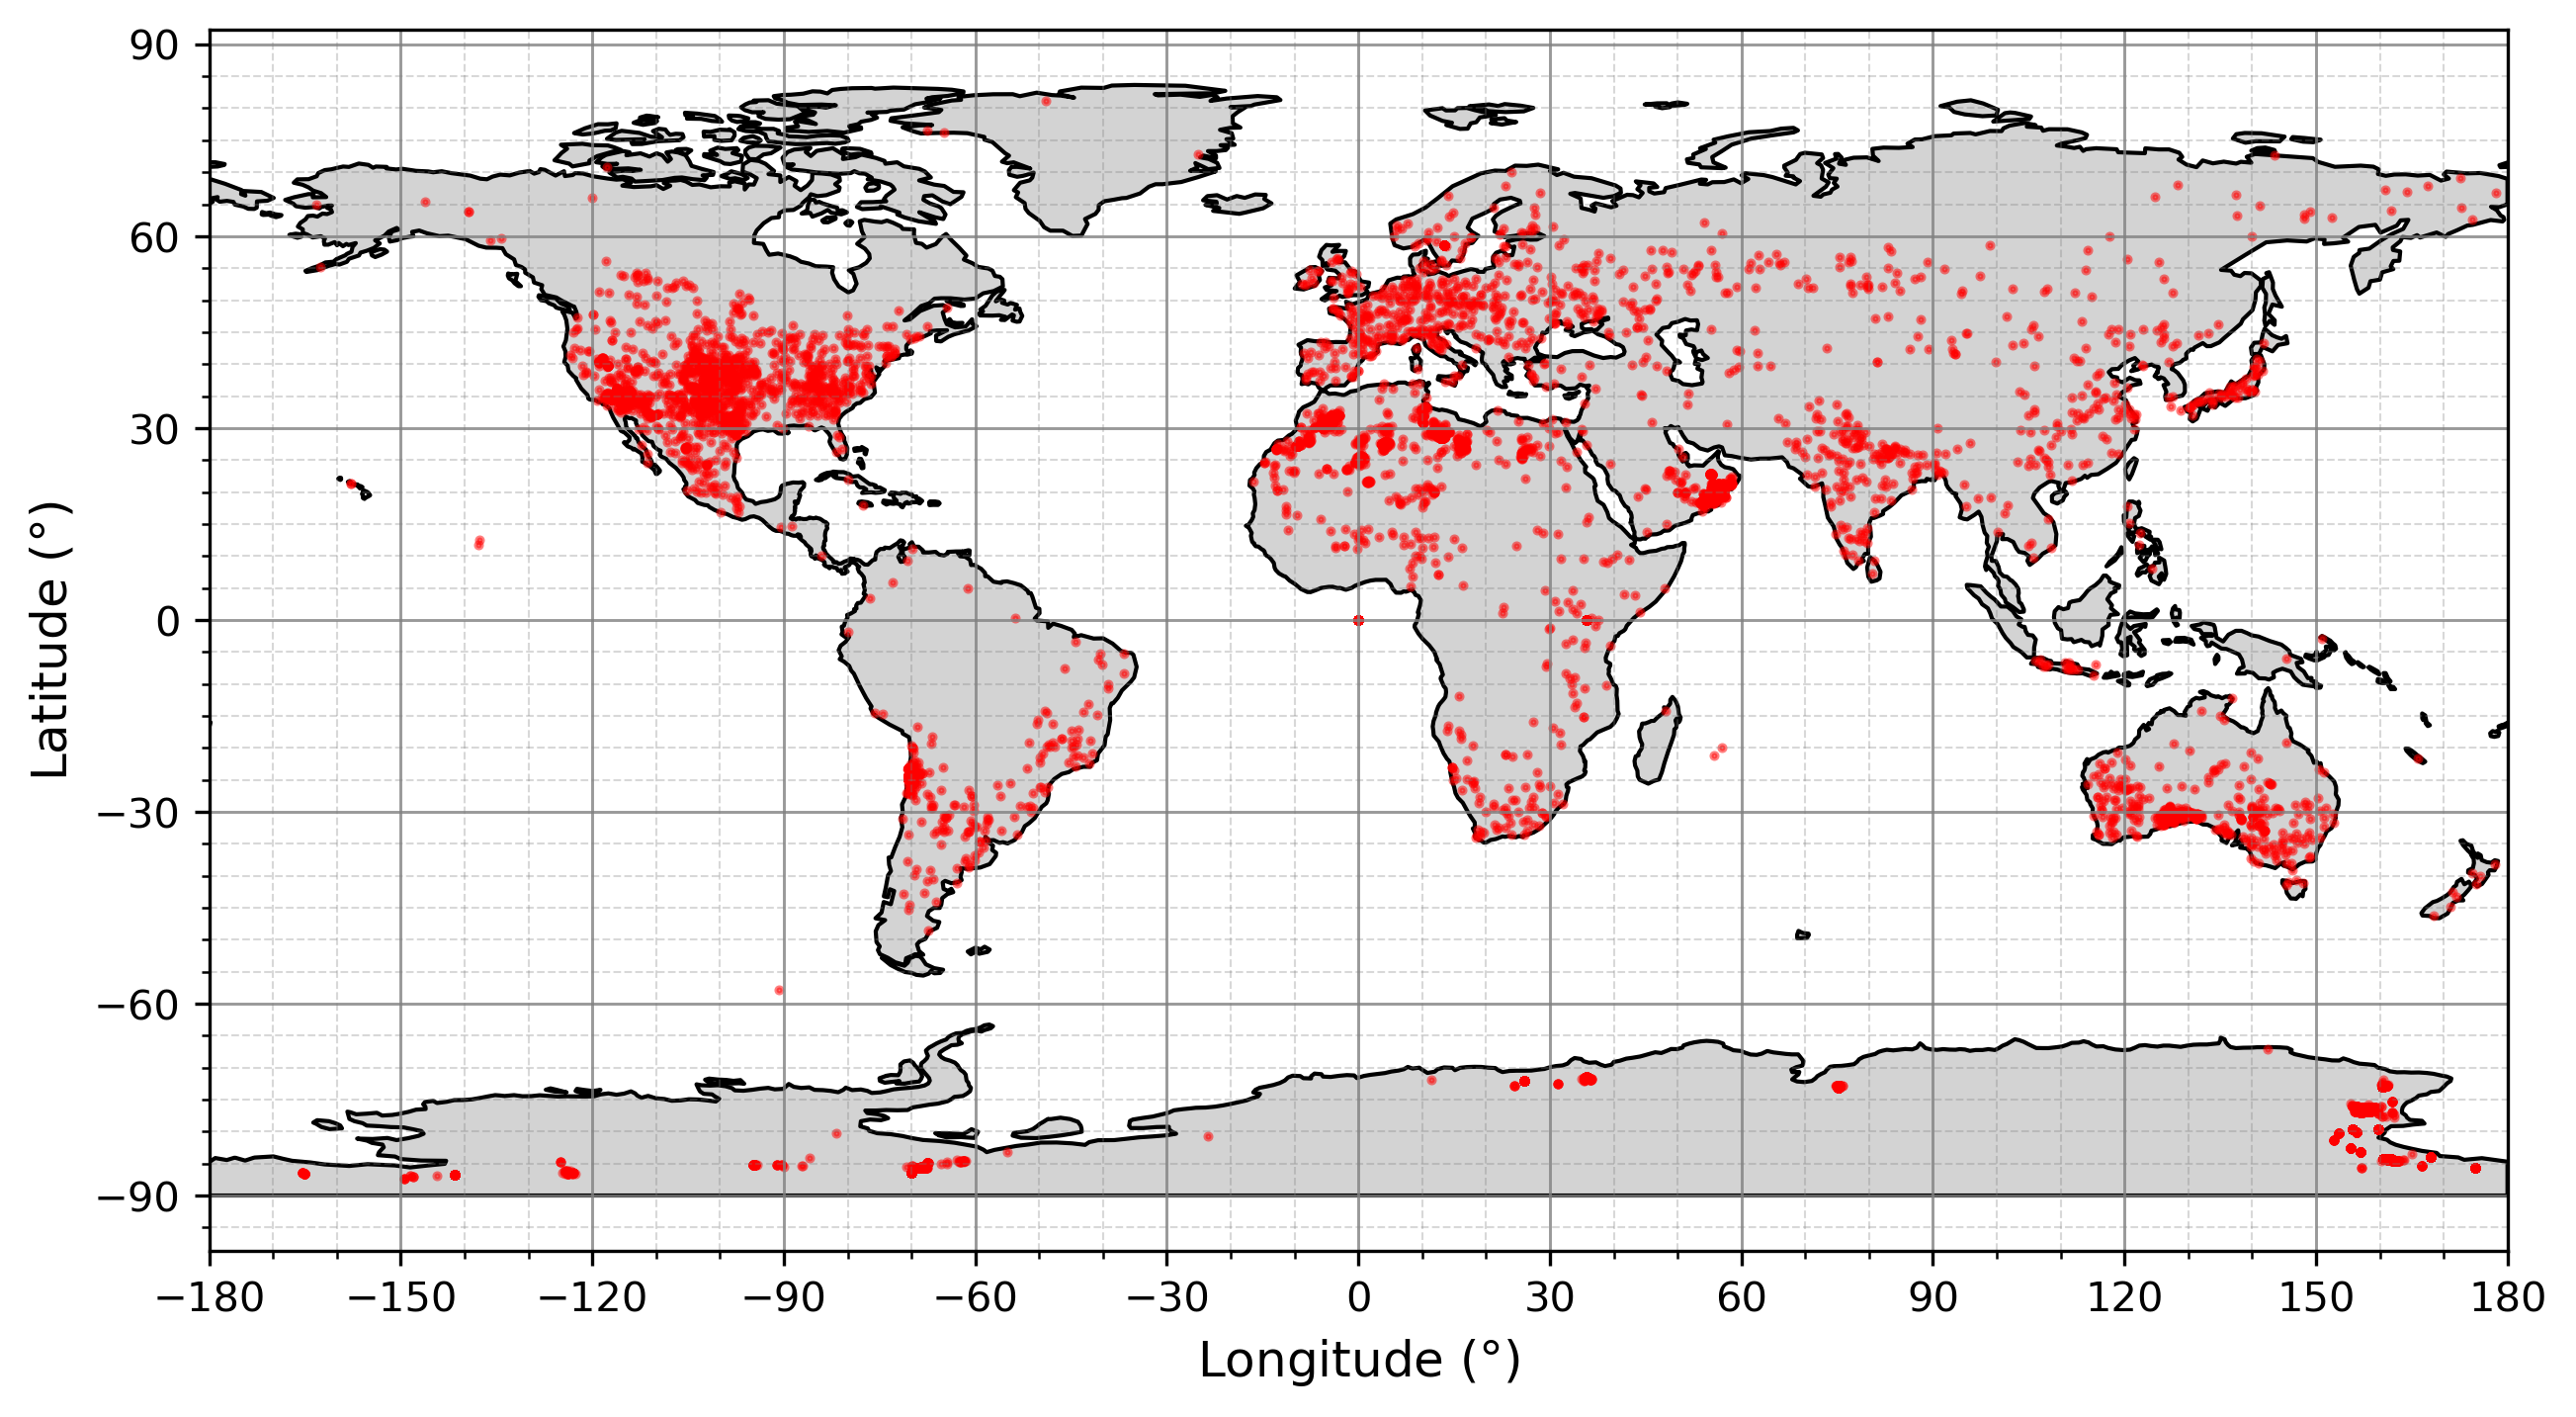

In [101]:
import geopandas as gpd
import geodatasets
from matplotlib.ticker import MultipleLocator

# Load world map
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))



# Convert points to GeoDataFrame
points = gpd.GeoDataFrame(
    clean_meteor_df,
    geometry=gpd.points_from_xy(clean_meteor_df['reclong'], clean_meteor_df['reclat']),
    crs="EPSG:4326"   # WGS84 lat/lon
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-180, 181, 30))  # every 30° longitude
ax.set_yticks(range(-90, 91, 30))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(10))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(5))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(-180,180)
plt.show()

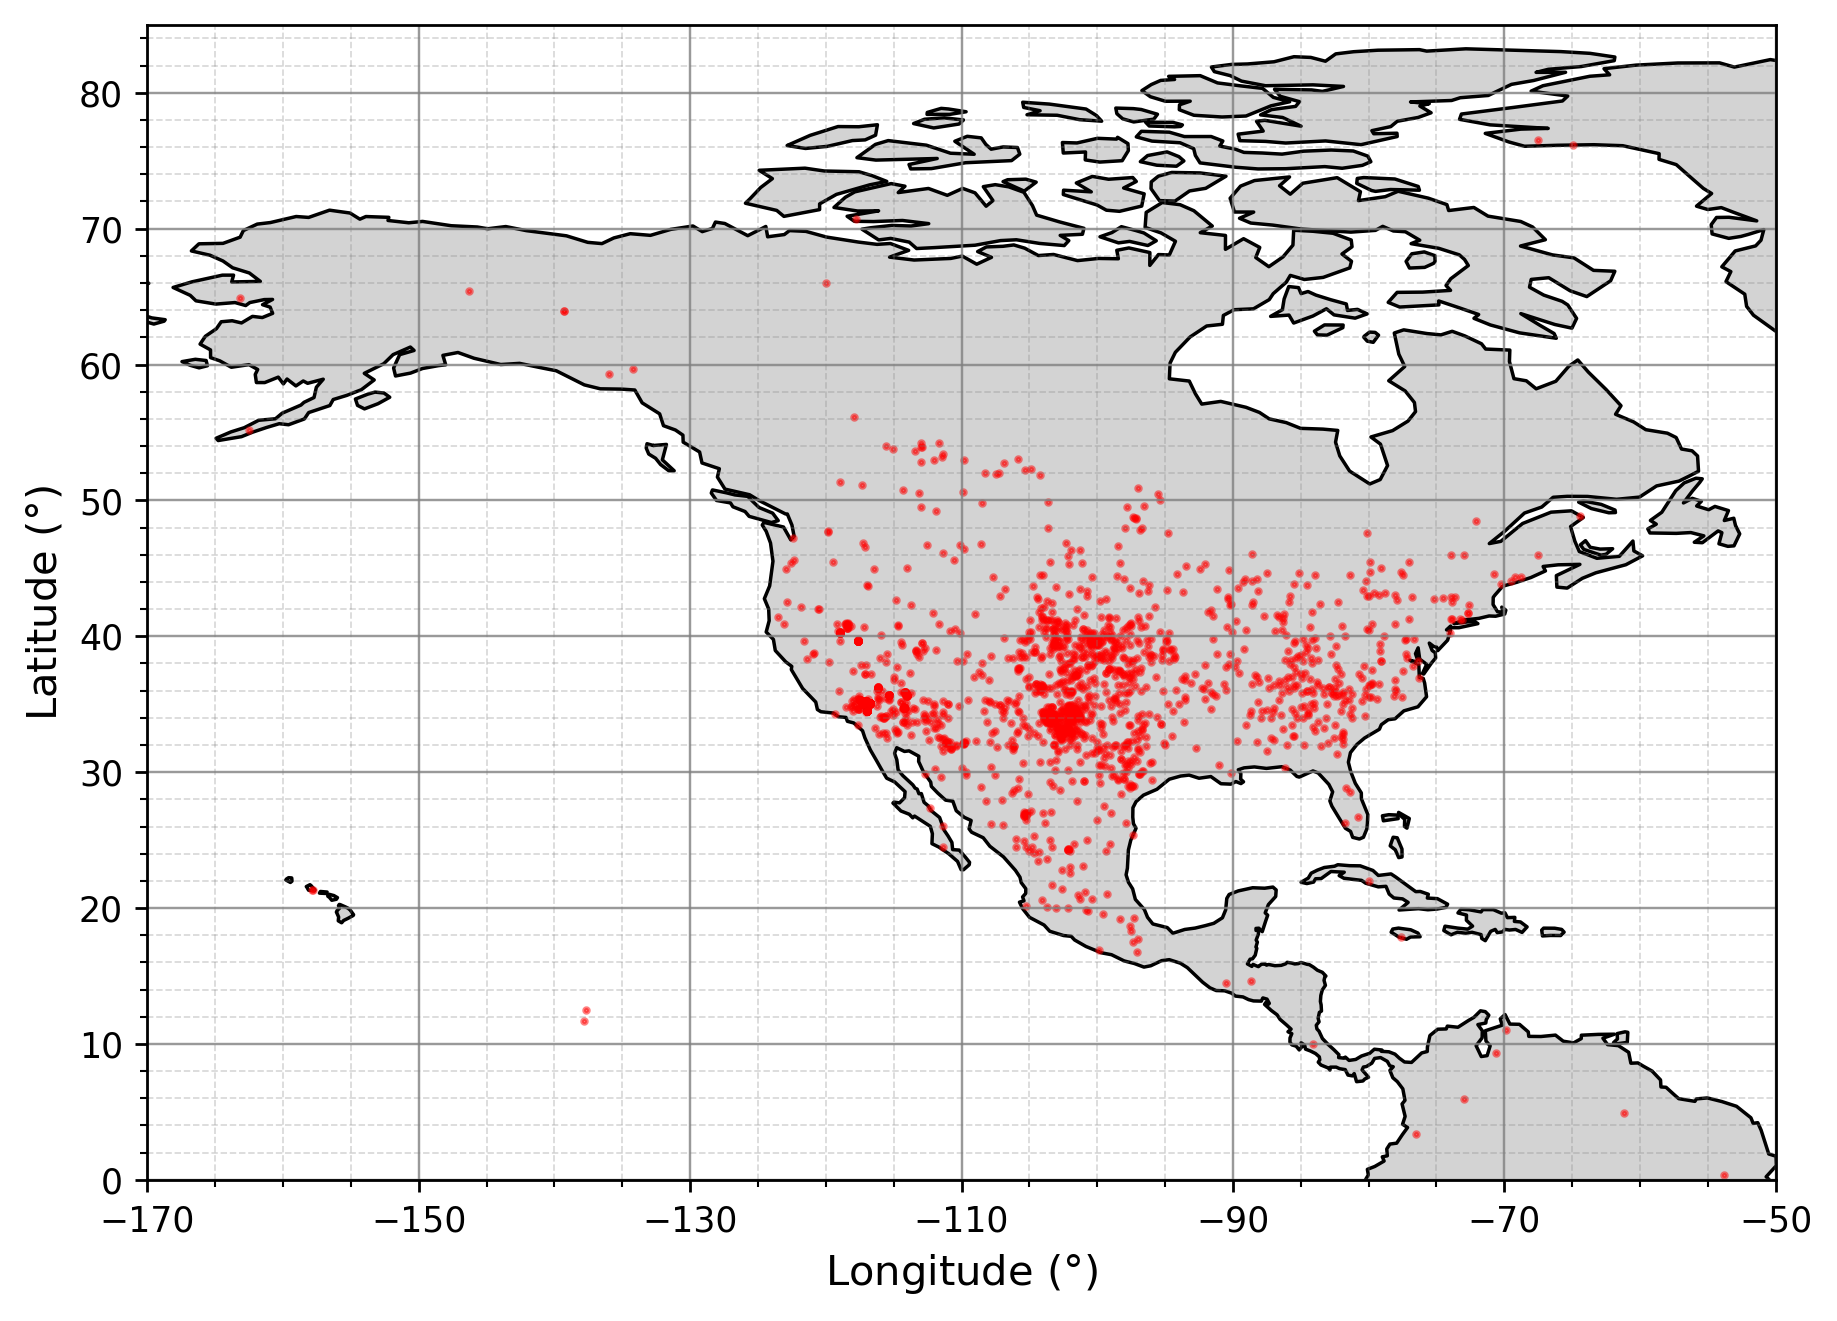

In [ ]:
#Zoom into North America

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-170, -50)
plt.ylim(5, 85)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-170, -40, 20))  # every 30° longitude
ax.set_yticks(range(0, 90, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

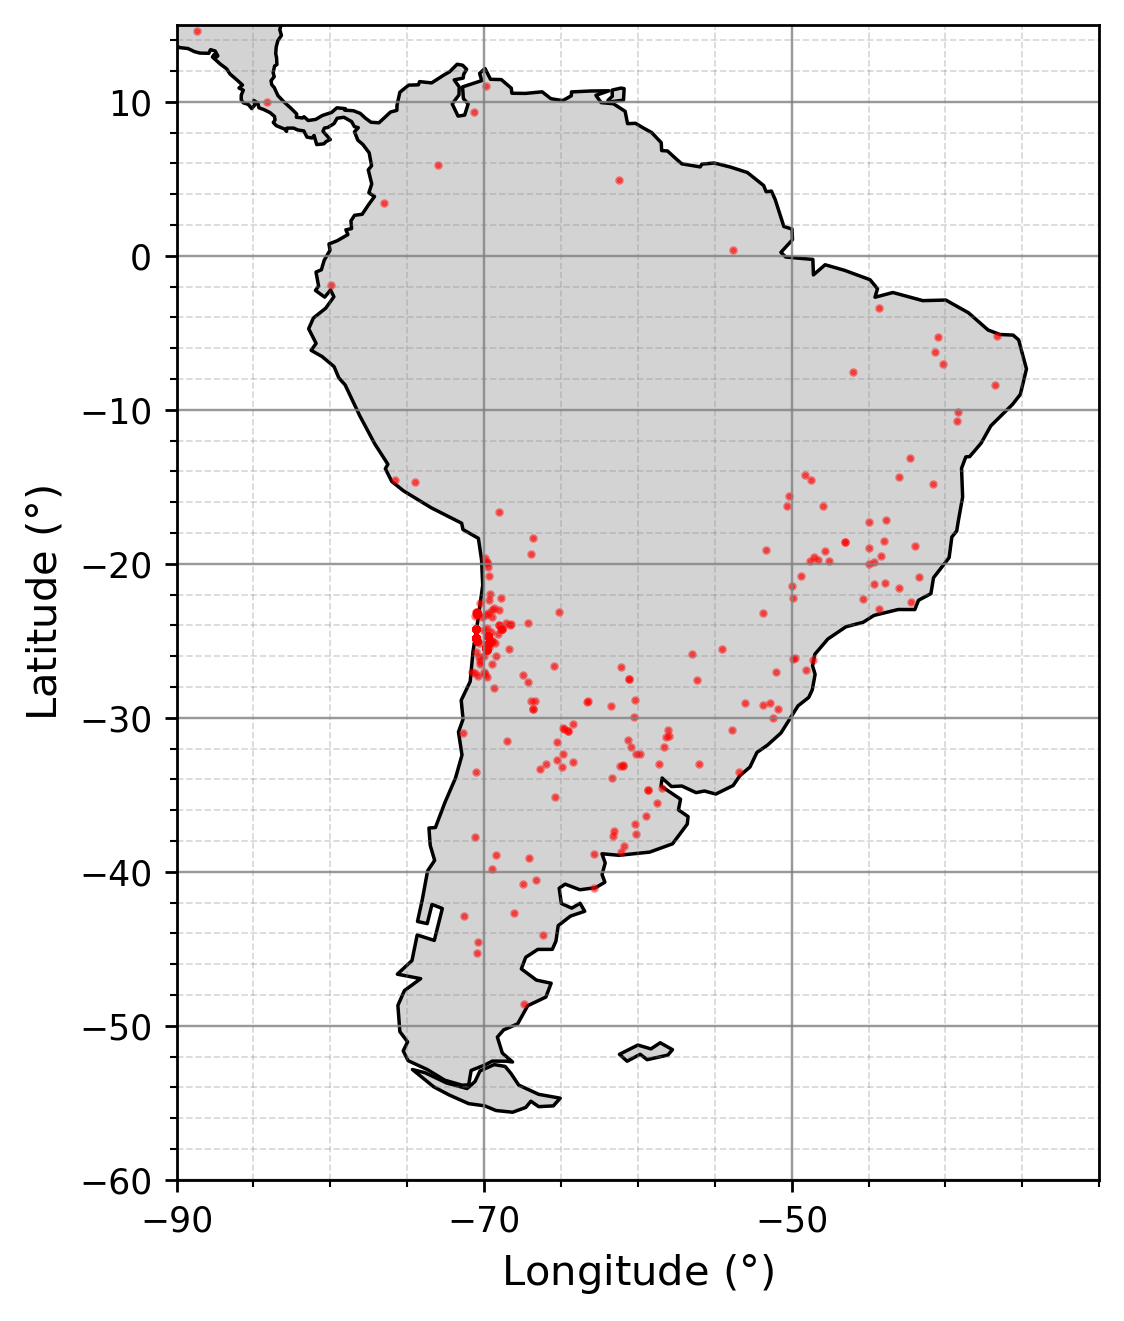

In [117]:
#Zoom into South America

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-90, -30)
plt.ylim(-50, 15)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-90, -30, 20))  # every 30° longitude
ax.set_yticks(range(-60, 20, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

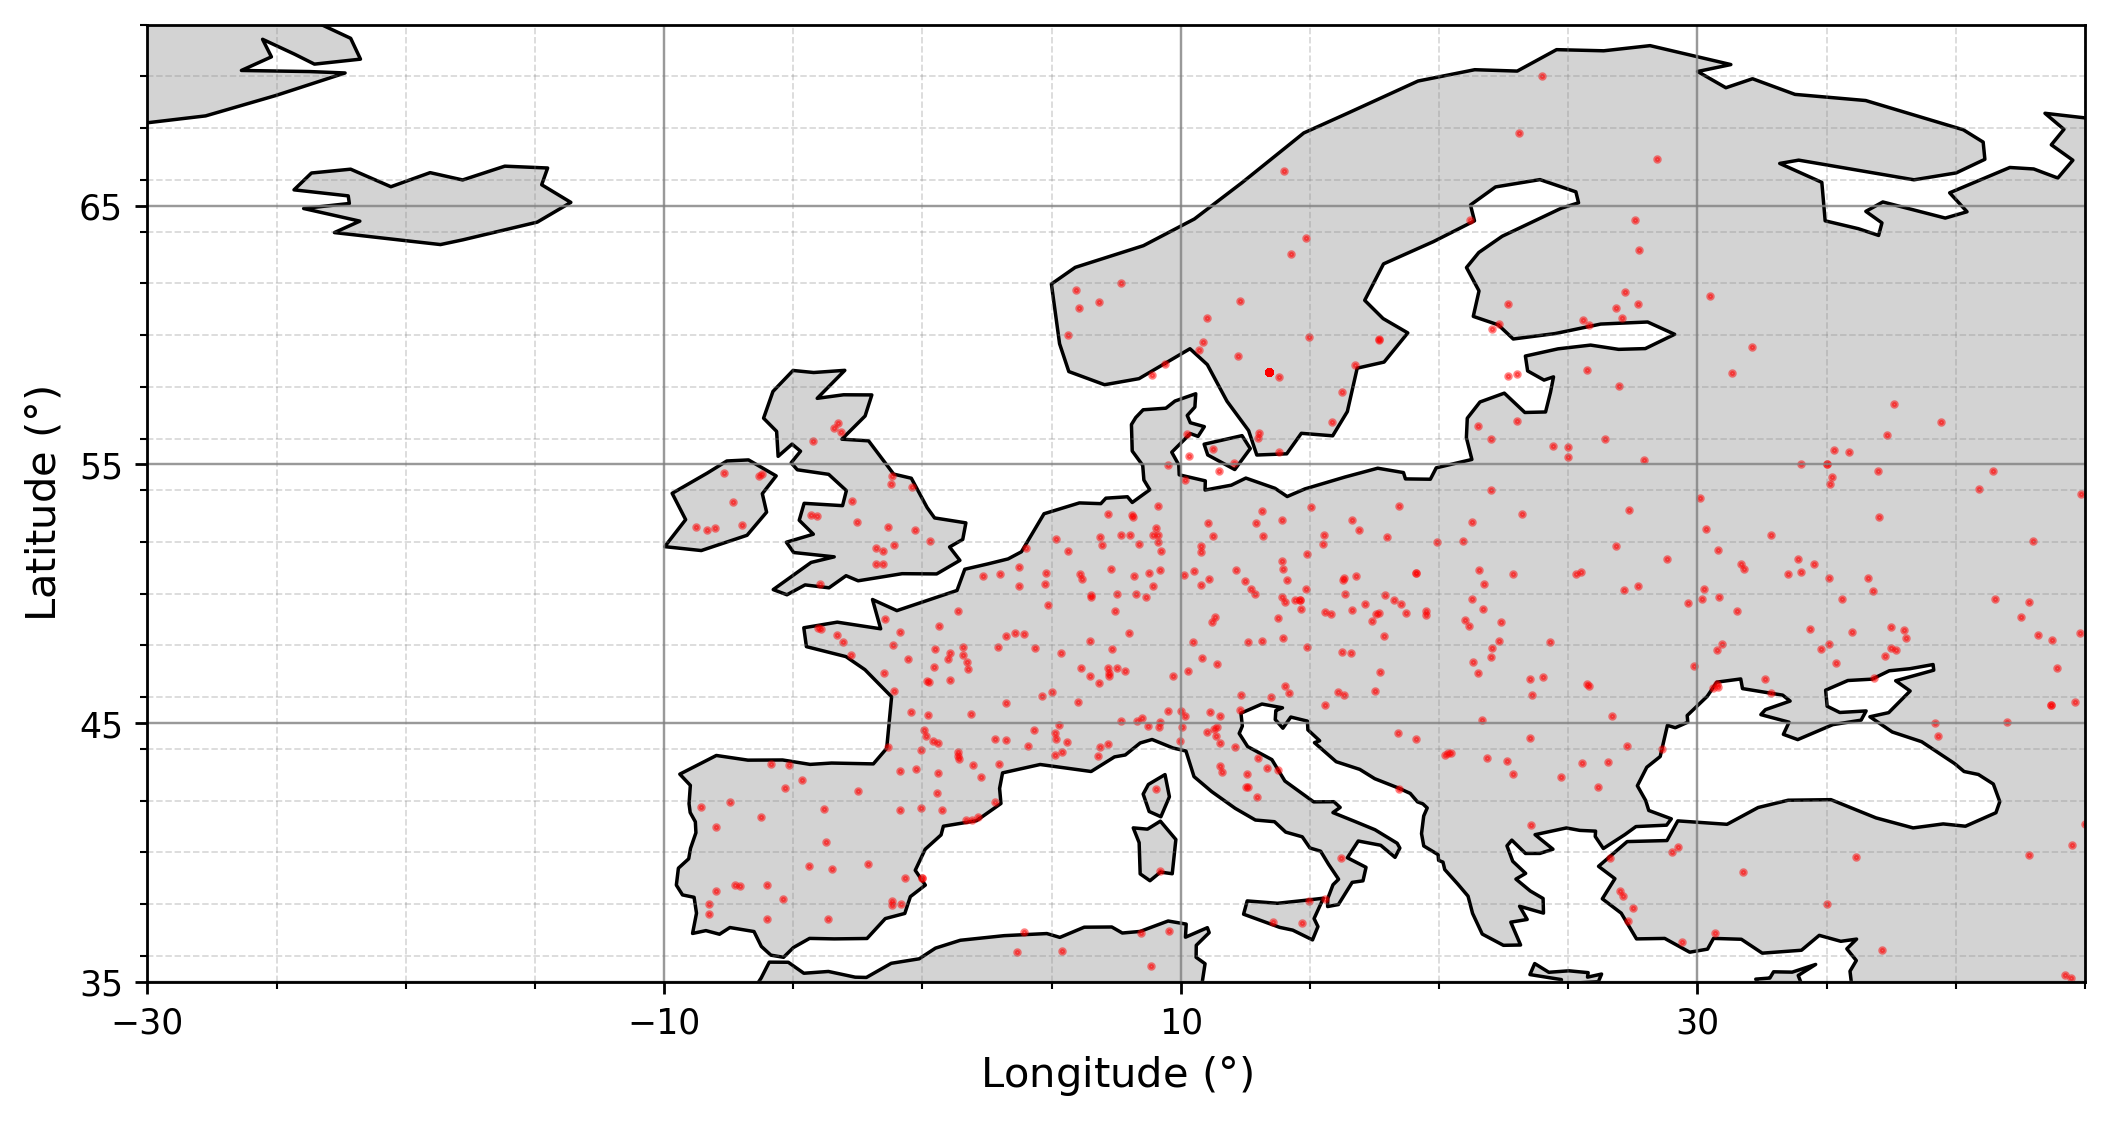

In [ ]:
#Zoom into Europe#Zoom into Asia

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for Asia
plt.xlim(30, 180)
plt.ylim(-15, 80)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(30, 180, 20))  # every 30° longitude
ax.set_yticks(range(-15, 80, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-25, 45)
plt.ylim(35, 72)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-30, 50, 20))  # every 30° longitude
ax.set_yticks(range(35, 72, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

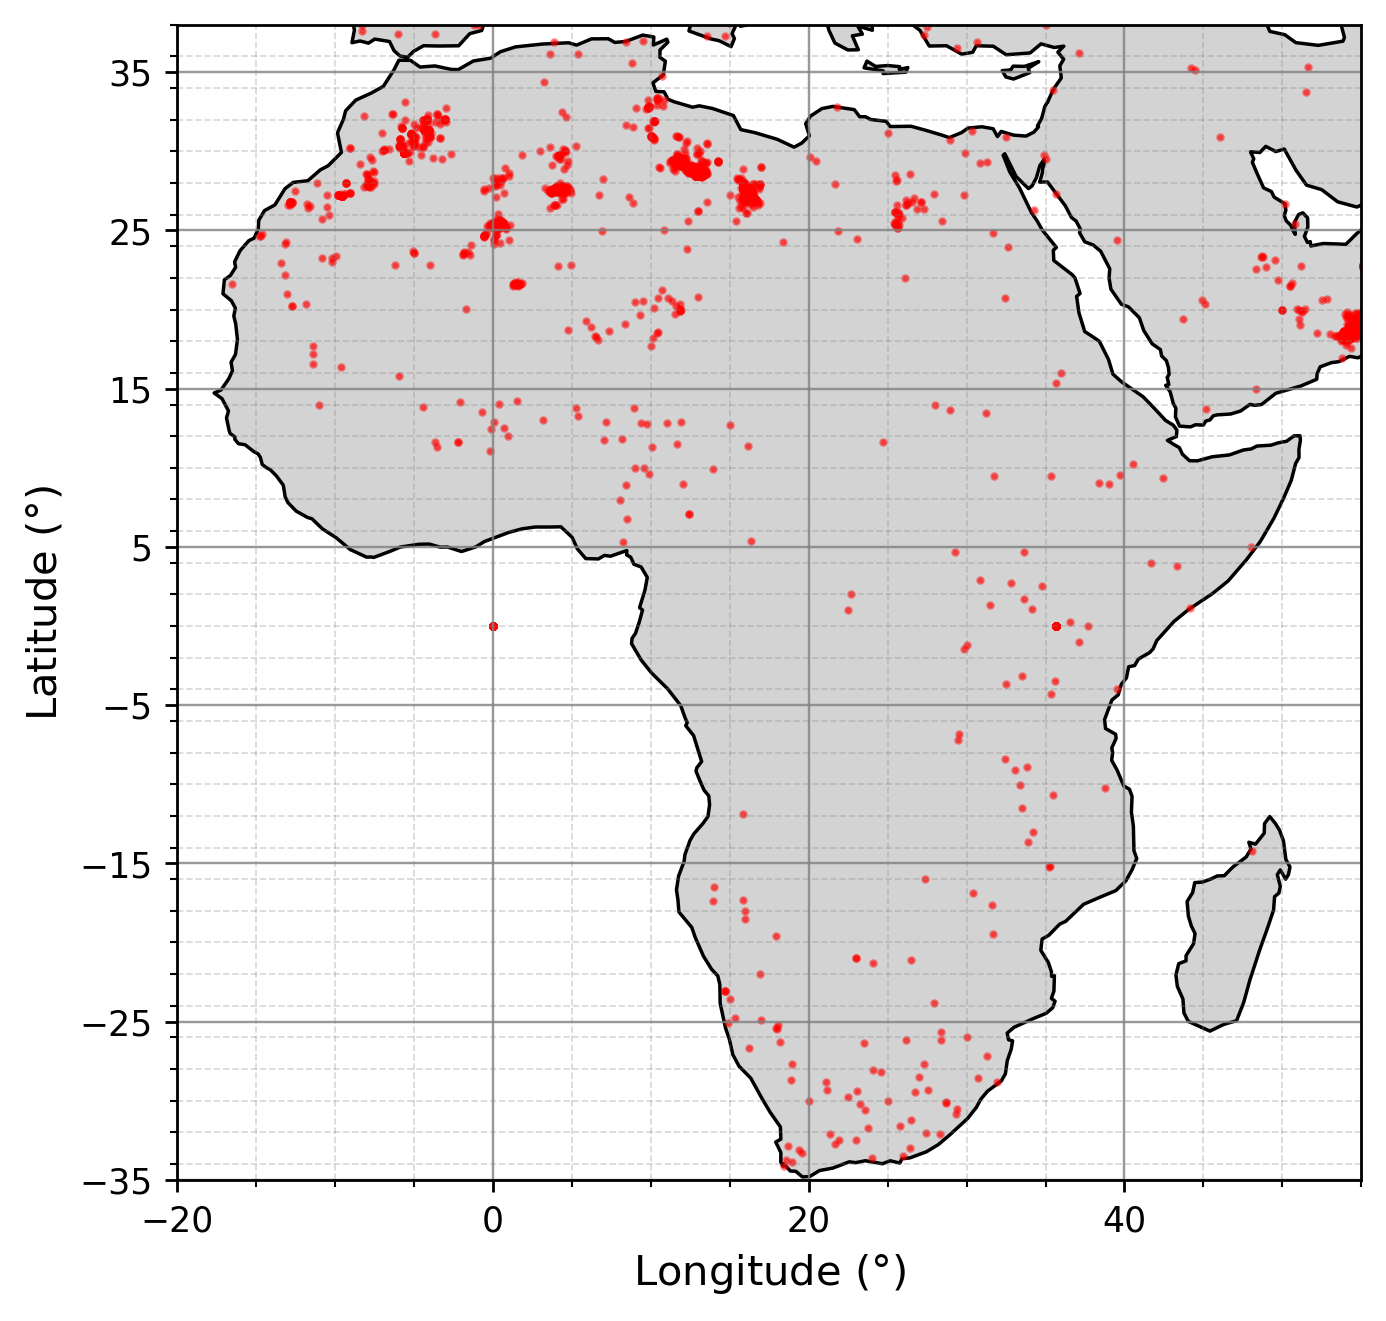

In [123]:
#Zoom into Africa

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-20, 55)
plt.ylim(-35, 38)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-20, 55, 20))  # every 30° longitude
ax.set_yticks(range(-35, 38, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

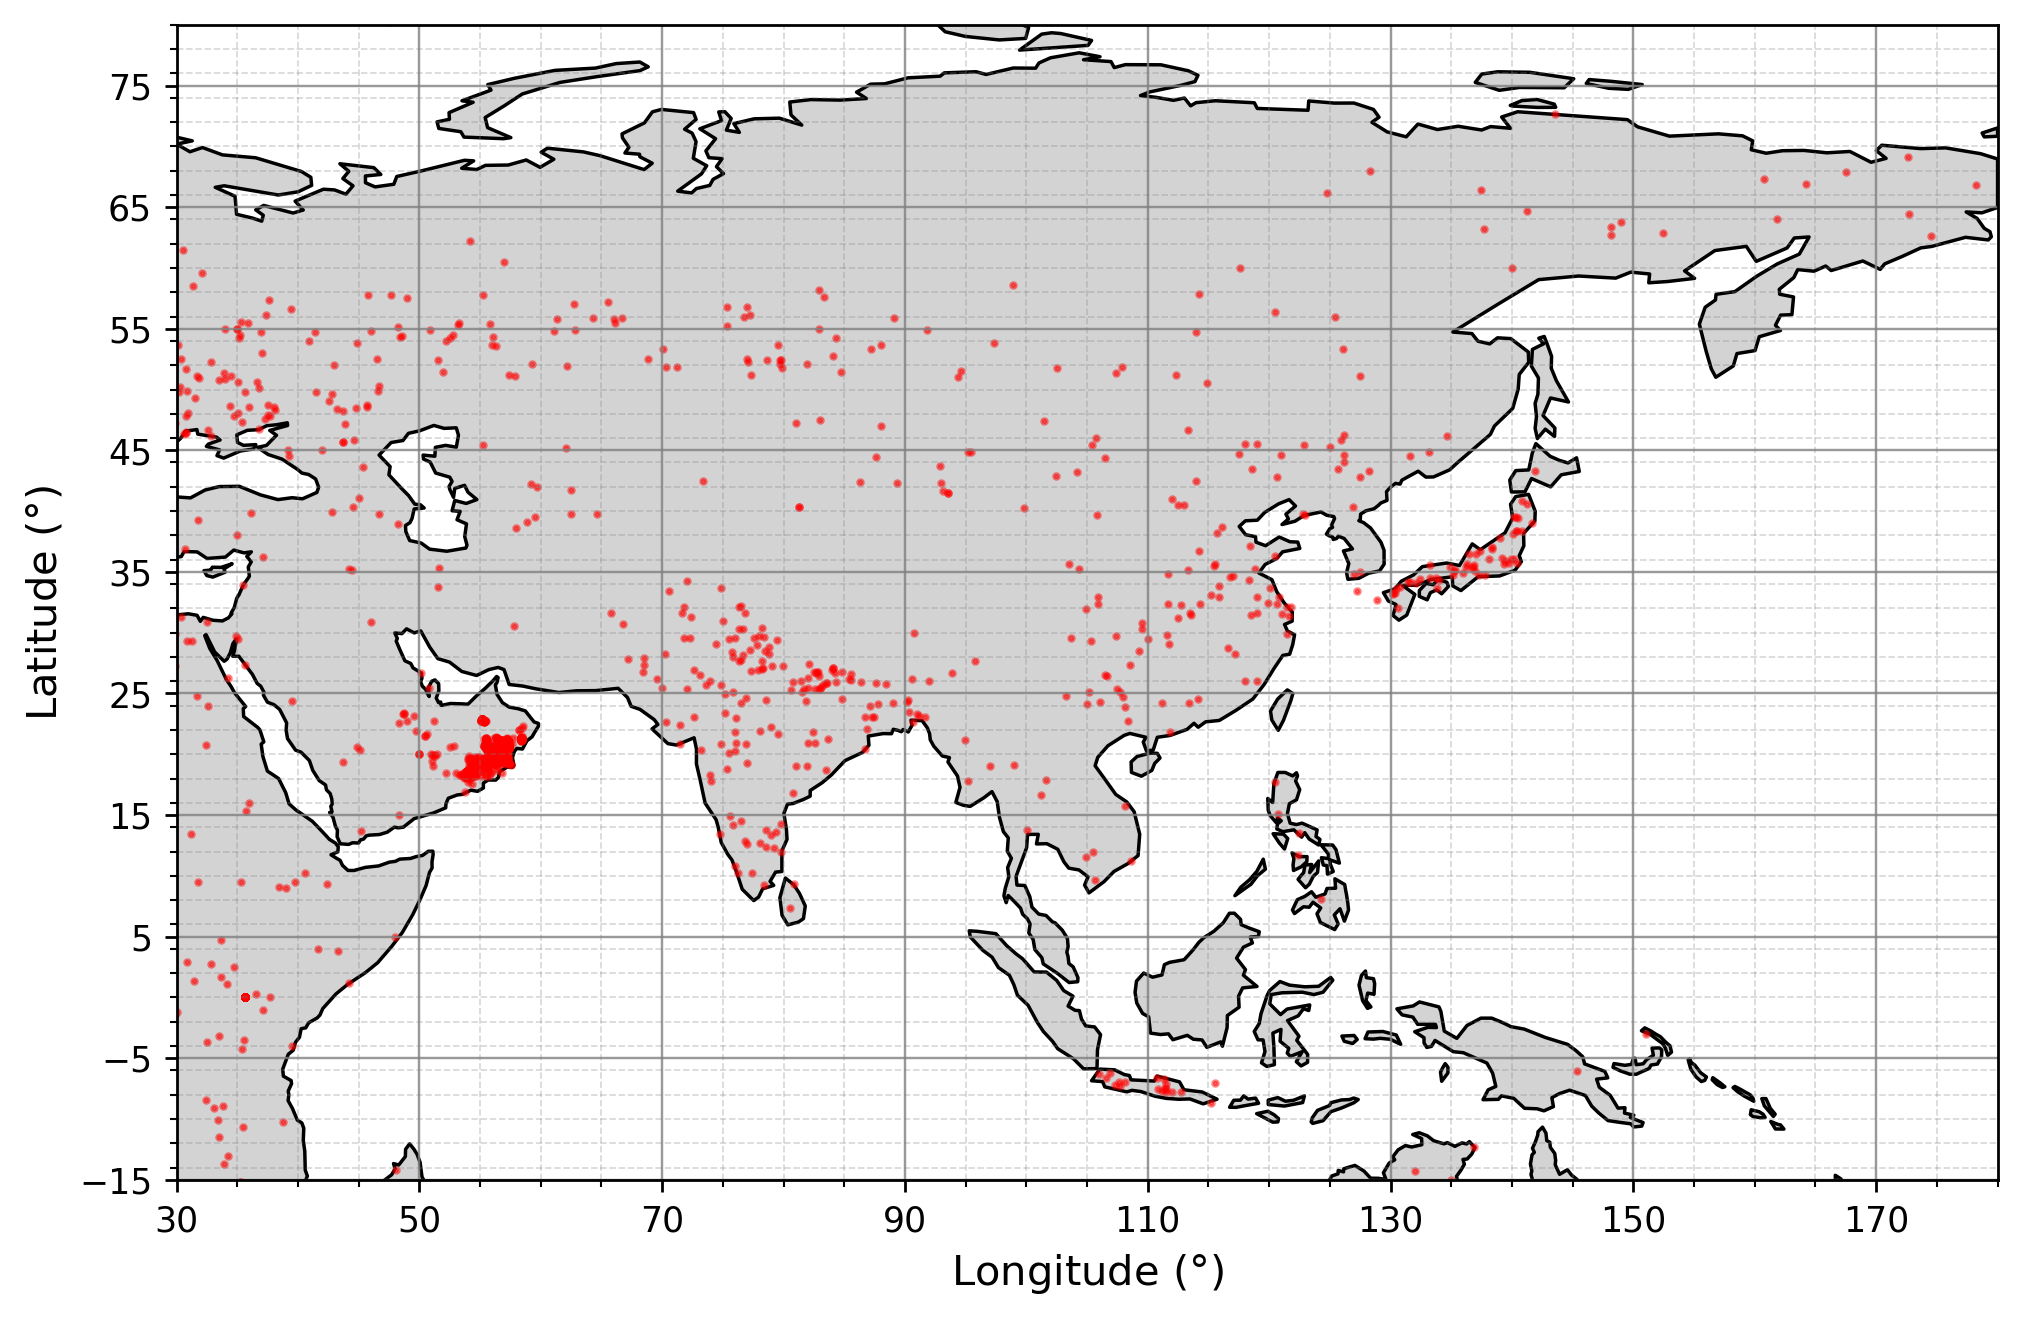

In [127]:
#Zoom into Asia

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for Asia
plt.xlim(30, 180)
plt.ylim(-15, 80)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(30, 180, 20))  # every 30° longitude
ax.set_yticks(range(-15, 80, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

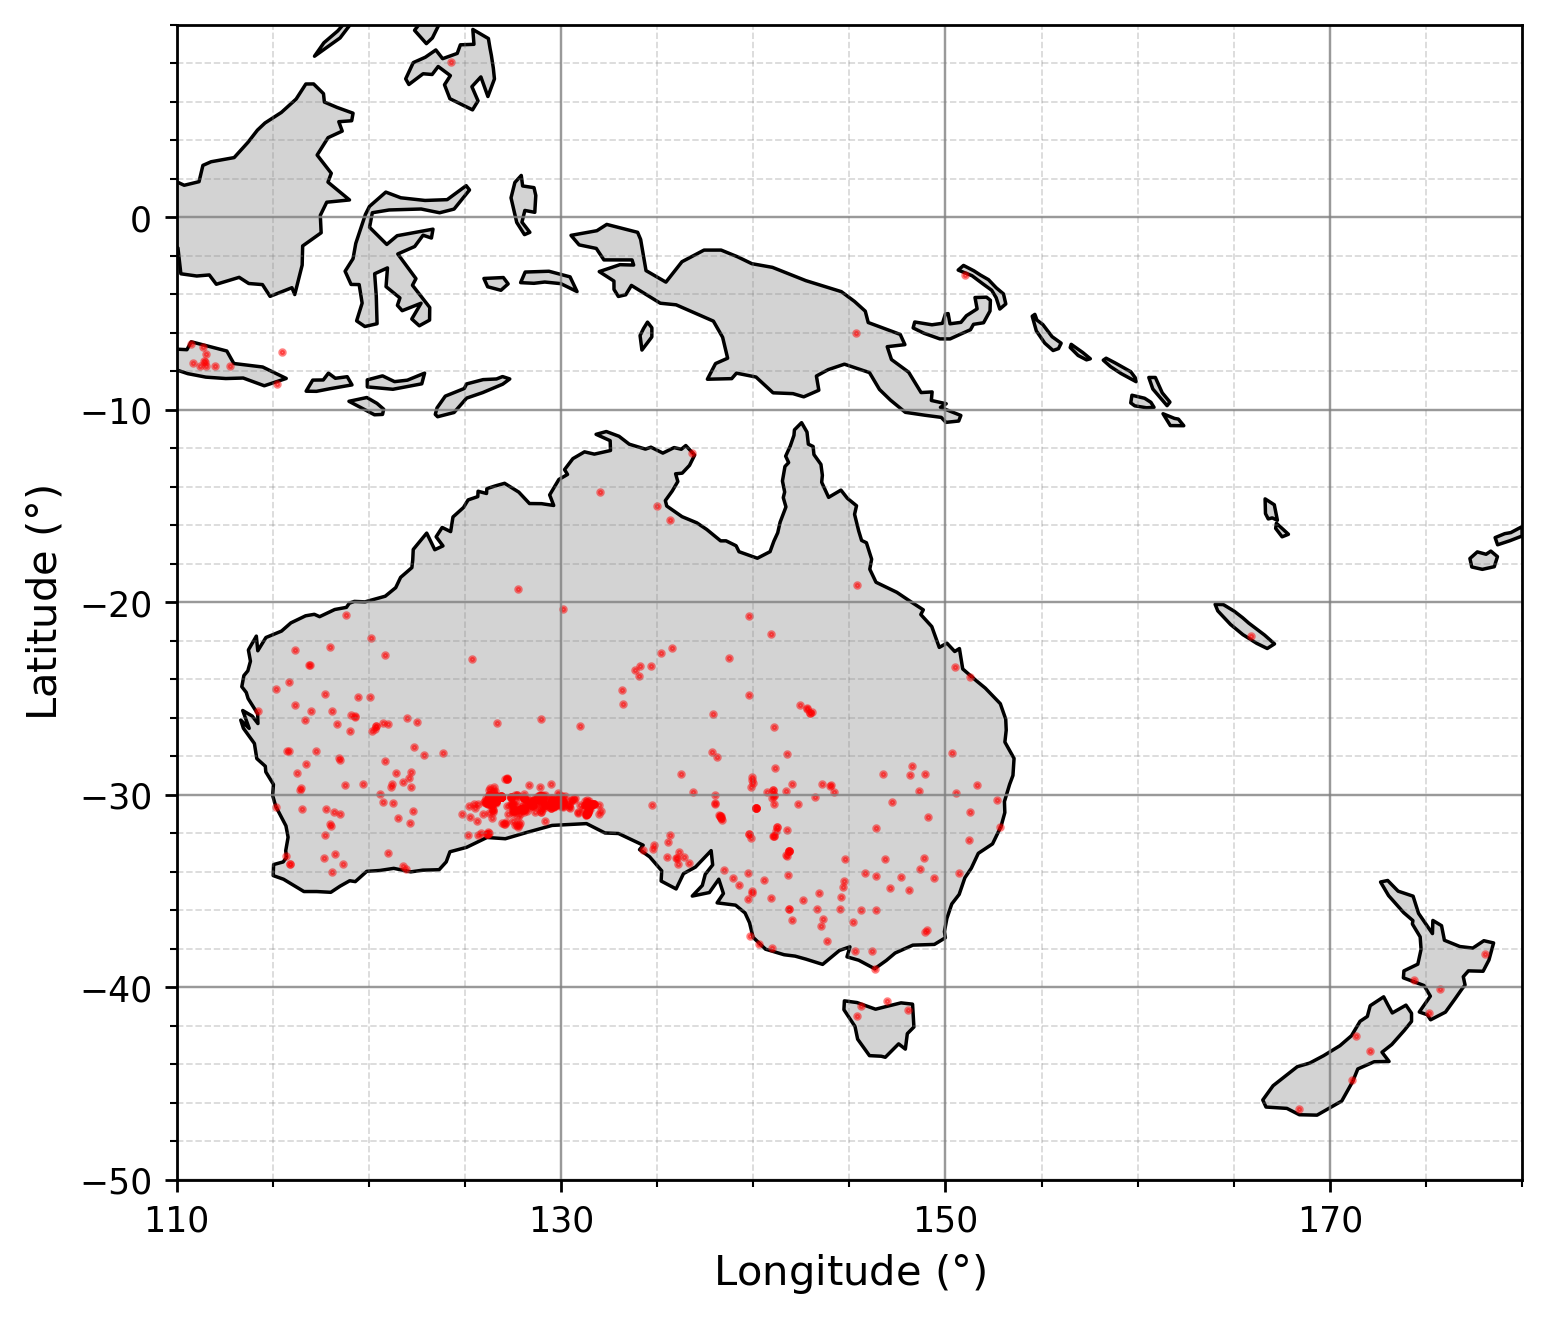

In [128]:
#Zoom into Australia

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for Asia
plt.xlim(110, 180)
plt.ylim(-50, 10)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(110, 180, 20))  # every 30° longitude
ax.set_yticks(range(-50, 10, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

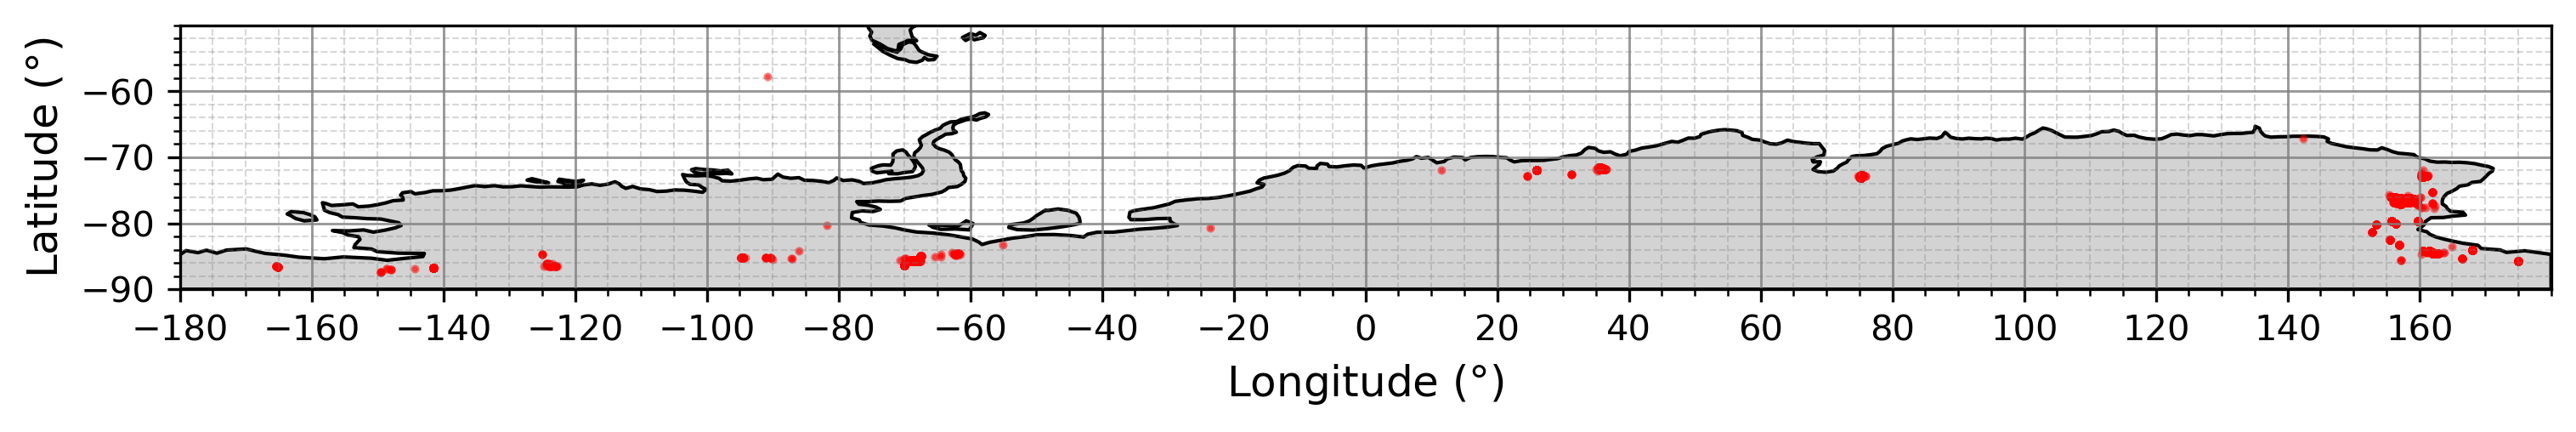

In [163]:
#Zoom into Antartica

fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for Asia
plt.xlim(-180, 180)
plt.ylim(-90, -50)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-180, 180, 20))  # every 30° longitude
ax.set_yticks(range(-90, -50, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

### Explore Differences between meteorites that have fell and meteorites that were found (fell vs. found)

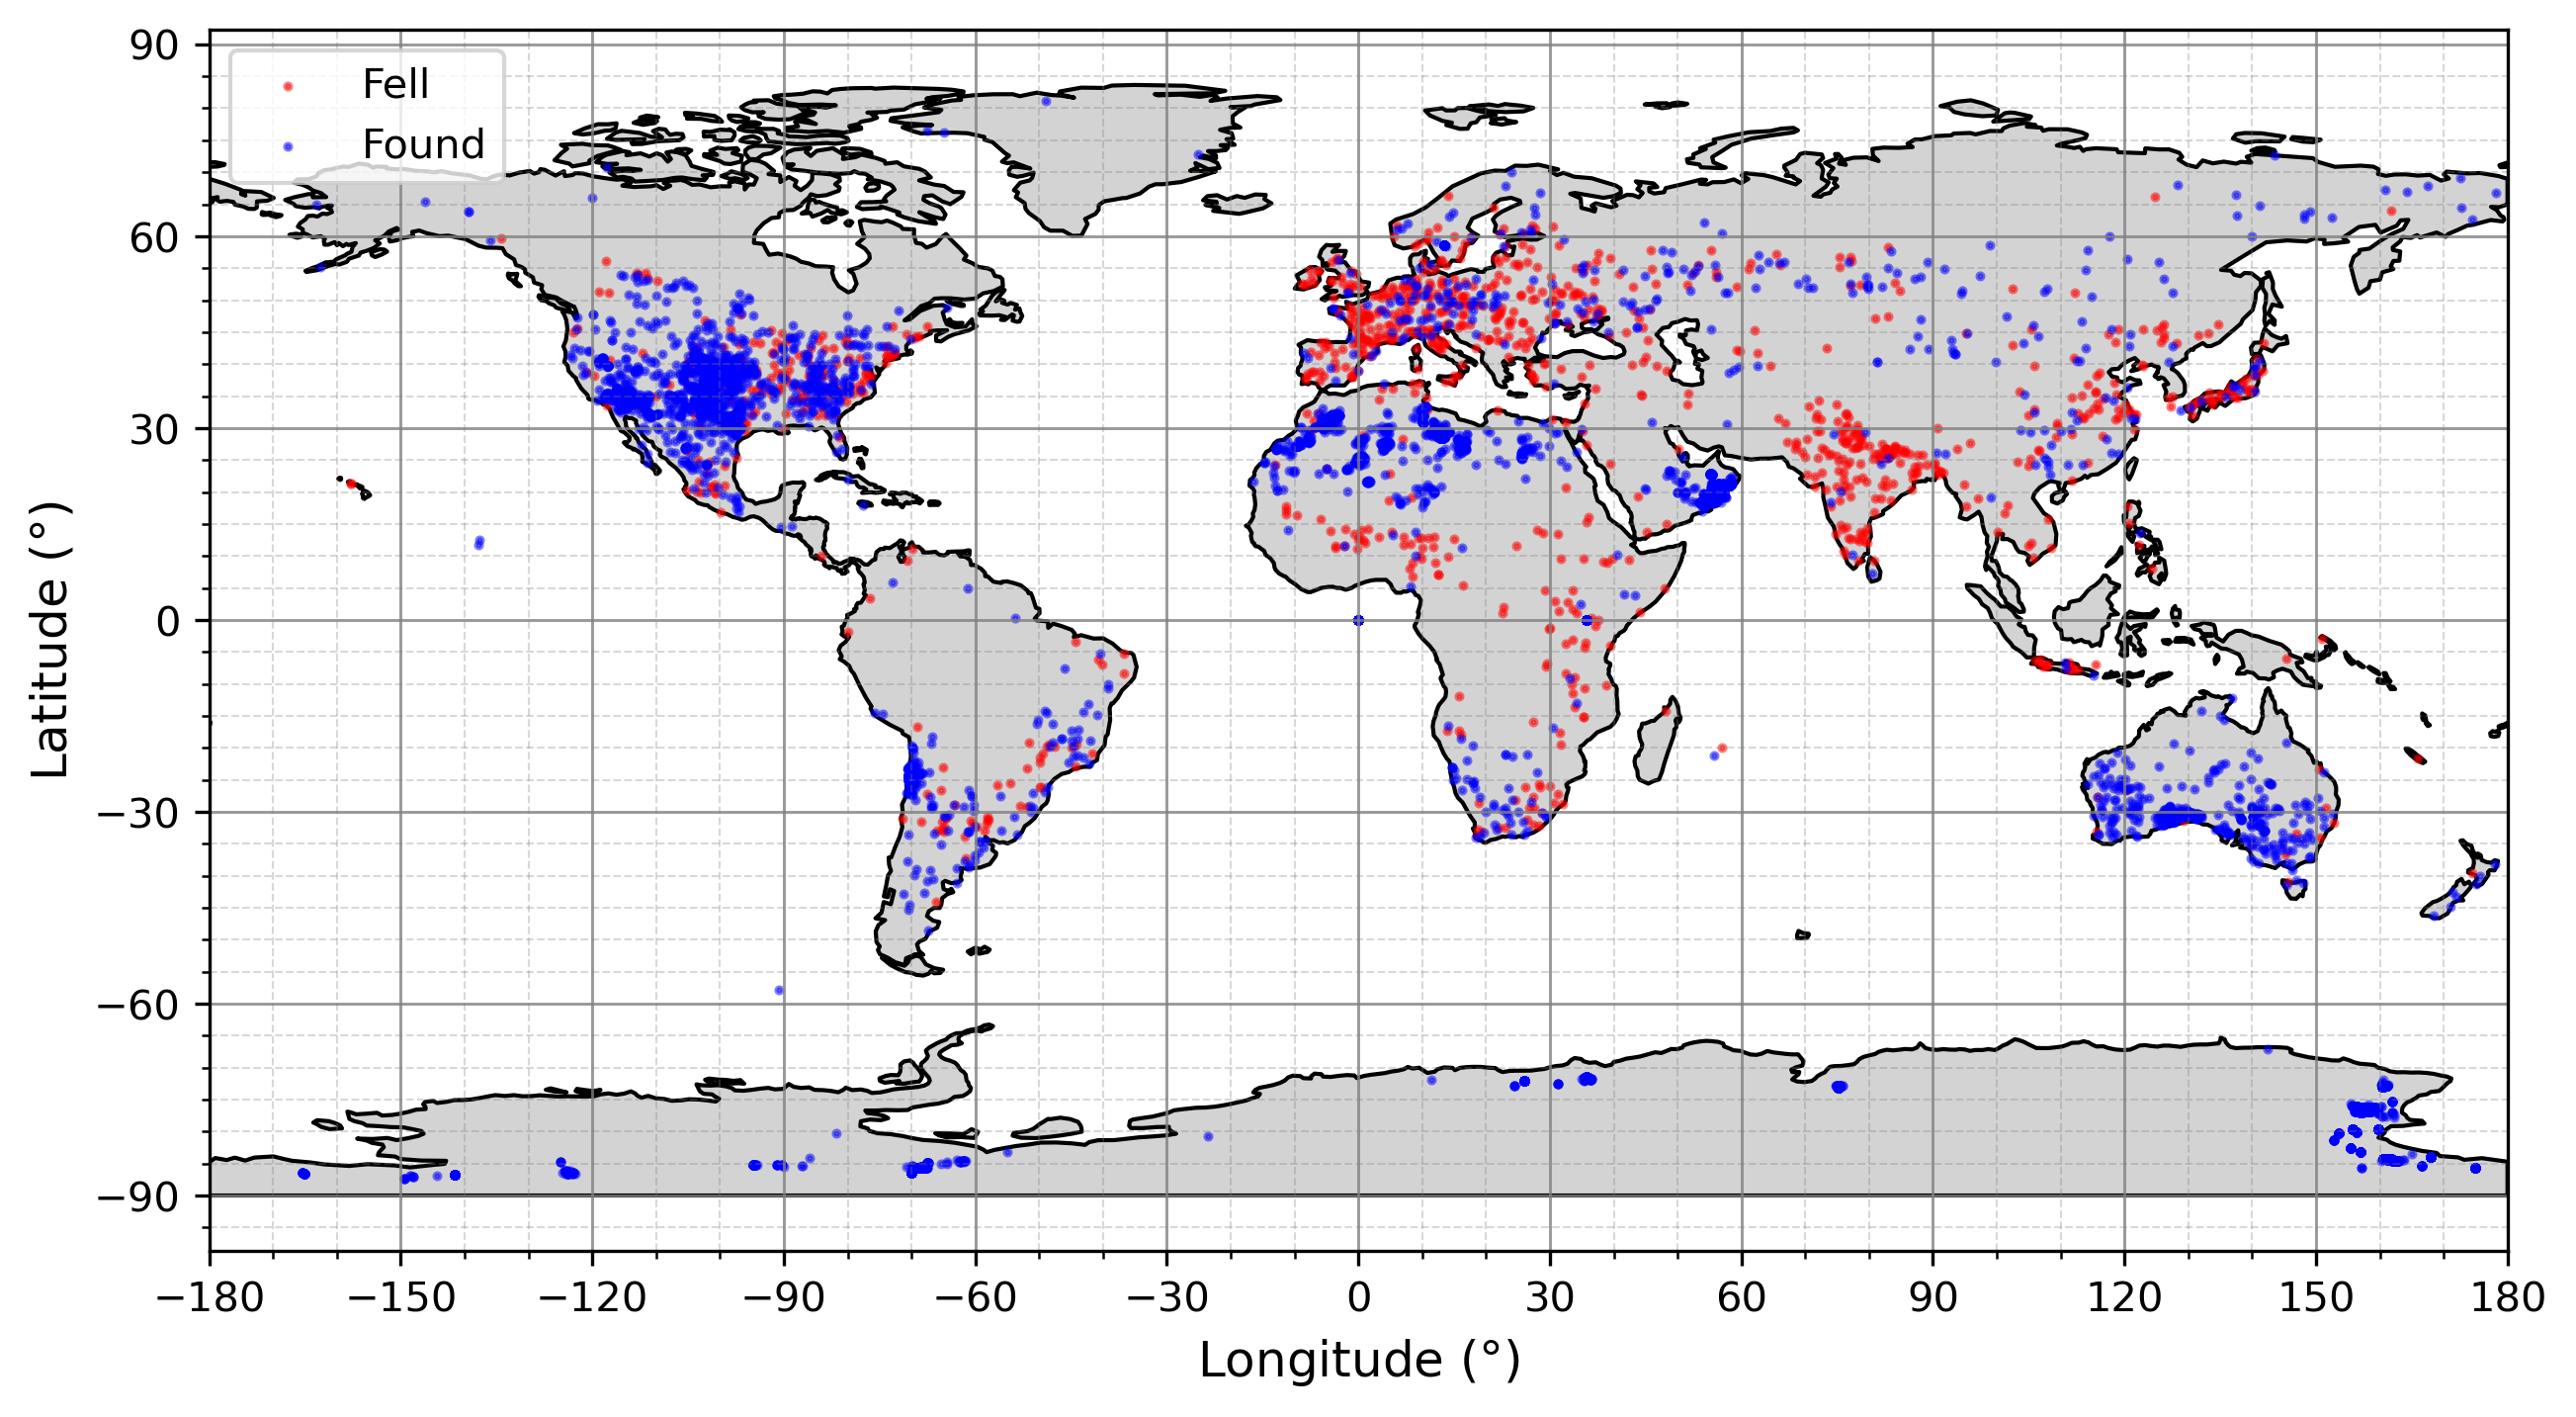

In [171]:
#Separate into fell and found

fell_df= clean_meteor_df[clean_meteor_df['fall'] == "Fell"]
found_df= clean_meteor_df[clean_meteor_df['fall'] == "Found"]



# Convert points to GeoDataFrame
fell = gpd.GeoDataFrame(
    fell_df,
    geometry=gpd.points_from_xy(fell_df['reclong'], fell_df['reclat']),
    crs="EPSG:4326"   # WGS84 lat/lon
)
found = gpd.GeoDataFrame(
    found_df,
    geometry=gpd.points_from_xy(found_df['reclong'], found_df['reclat']),
    crs="EPSG:4326"   # WGS84 lat/lon
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
world.plot(ax=ax, color='lightgray', edgecolor='black')
fell.plot(ax=ax, color='red', markersize=2, alpha=0.5, label="Fell")
found.plot(ax=ax, color='blue', markersize=2, alpha=0.5, label="Found")


#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-180, 181, 30))  # every 30° longitude
ax.set_yticks(range(-90, 91, 30))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(10))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(5))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(-180,180)
plt.legend()
plt.show()

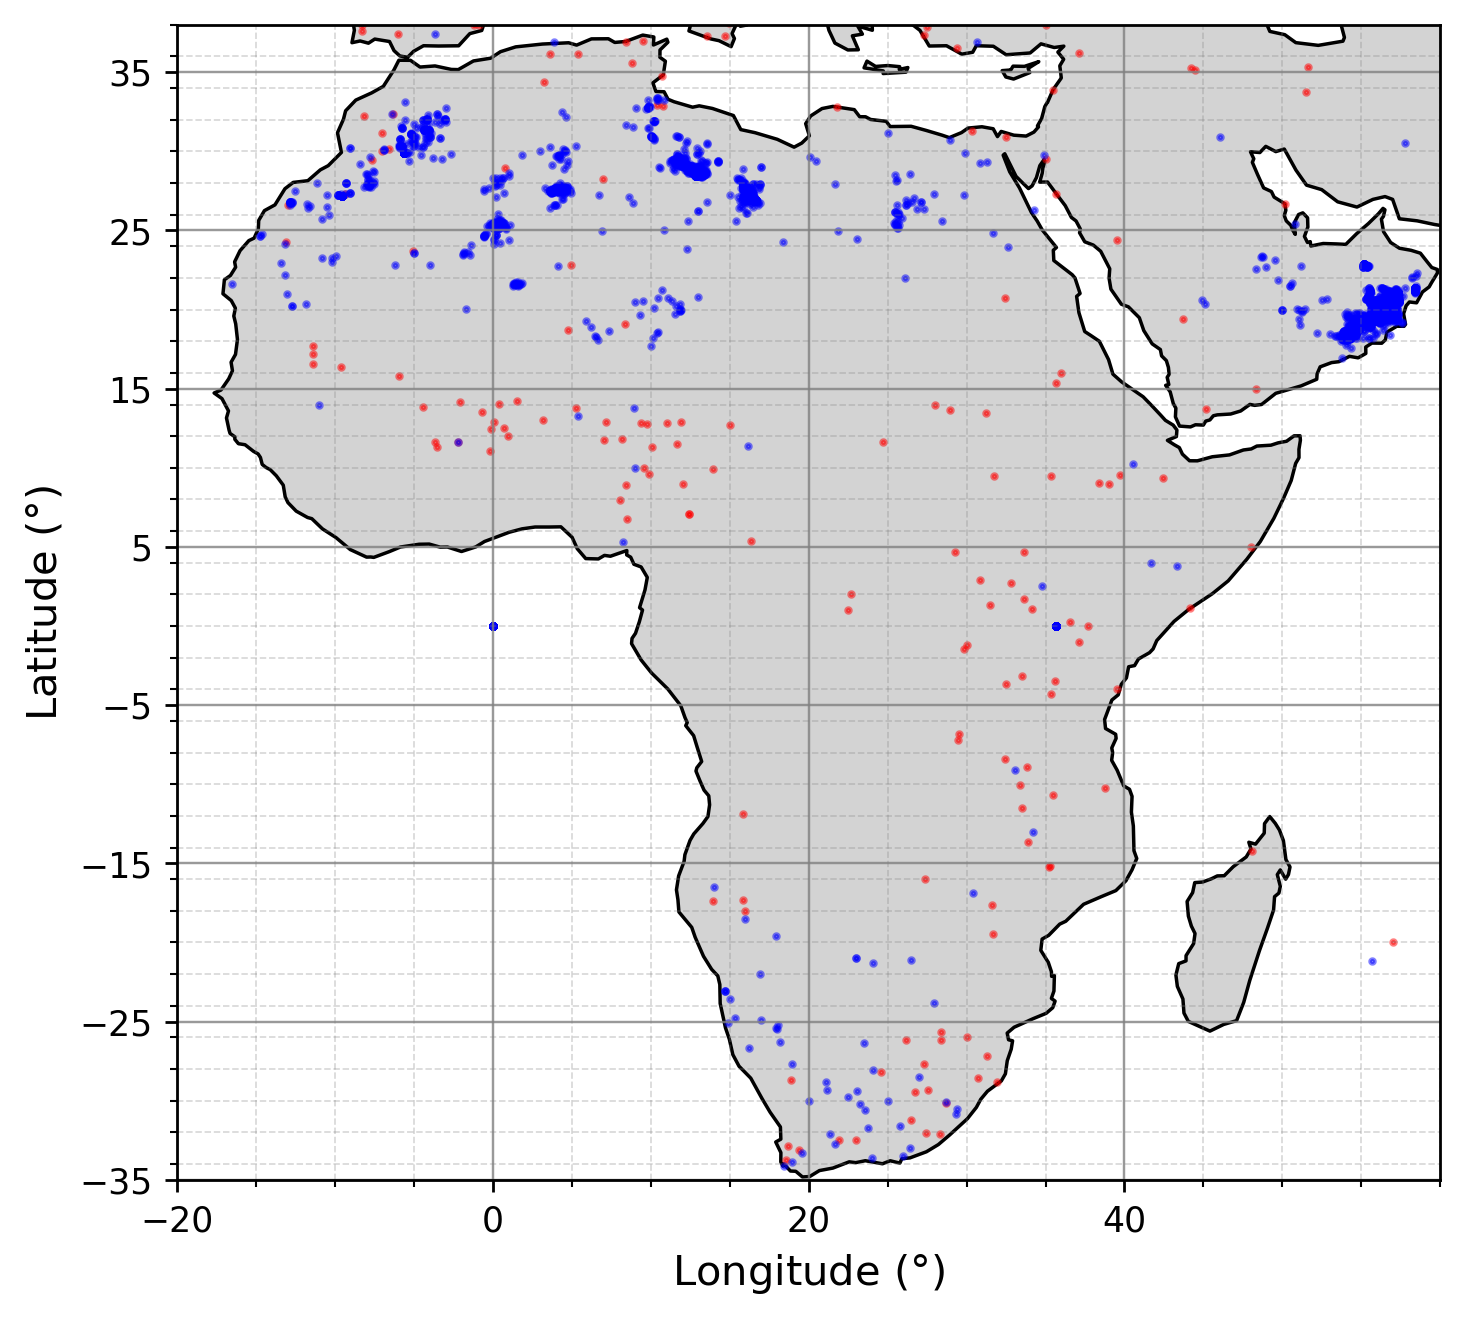

In [167]:
#Zoom into Africa

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
fell.plot(ax=ax, color='red', markersize=2, alpha=0.5, label="Fell")
found.plot(ax=ax, color='blue', markersize=2, alpha=0.5, label="Found")

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-20, 60)
plt.ylim(-35, 38)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-20, 60, 20))  # every 30° longitude
ax.set_yticks(range(-35, 38, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()